In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sqlite3 
import seaborn as sns 


In [27]:
ruta_db = r"C:\Users\osmai\Downloads\sanoyfresco\sanoyfresco.db"

#ruta_db = r"C:\Users\osmai\Downloads\sanoyfresco\sanoyfresco.db"

# Conexión a la base de datos
conexion = sqlite3.connect(ruta_db)

# Consultar las tablas disponibles
consulta_tablas = "SELECT name FROM sqlite_master WHERE type='table';"
tablas = pd.read_sql_query(consulta_tablas, conexion)

# Mostrar resultado
print("Tablas encontradas en la base de datos:")
print(tablas)

Tablas encontradas en la base de datos:
      name
0  tickets


In [31]:
df = pd.read_sql_query("SELECT * FROM tickets;", conexion)
print(df.head())

   id_pedido  id_cliente                fecha  hora  id_departamento  \
0          1      112108  2023-02-02 00:00:00    10                4   
1          1      112108  2023-02-02 00:00:00    10                4   
2          1      112108  2023-02-02 00:00:00    10                4   
3          2      202279  2023-02-03 00:00:00     9                4   
4          2      202279  2023-02-03 00:00:00     9                4   

   id_seccion  id_producto                  nombre_producto  precio_unitario  \
0          83        49683                     Pepino Kirby             0.99   
1          24        13176       Bolsa de Bananas Orgánicas             2.45   
2          24        47209           Aguacate Hass Orgánico             1.79   
3          83        28985  Col Rizada Orgánica de Michigan             2.55   
4          83        17794                       Zanahorias             0.95   

   cantidad  precio_total  
0         4          3.96  
1         4          9.80  
2 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975718 entries, 0 to 4975717
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id_pedido        int64  
 1   id_cliente       int64  
 2   fecha            object 
 3   hora             int64  
 4   id_departamento  int64  
 5   id_seccion       int64  
 6   id_producto      int64  
 7   nombre_producto  object 
 8   precio_unitario  float64
 9   cantidad         int64  
 10  precio_total     float64
dtypes: float64(2), int64(7), object(2)
memory usage: 417.6+ MB


In [37]:
df['fecha']=pd.to_datetime(df['fecha'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975718 entries, 0 to 4975717
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id_pedido        int64         
 1   id_cliente       int64         
 2   fecha            datetime64[ns]
 3   hora             int64         
 4   id_departamento  int64         
 5   id_seccion       int64         
 6   id_producto      int64         
 7   nombre_producto  object        
 8   precio_unitario  float64       
 9   cantidad         int64         
 10  precio_total     float64       
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 417.6+ MB


In [43]:
df.isnull().sum()

id_pedido          0
id_cliente         0
fecha              0
hora               0
id_departamento    0
id_seccion         0
id_producto        0
nombre_producto    0
precio_unitario    0
cantidad           0
precio_total       0
dtype: int64

In [51]:
df.nombre_producto.unique()

array(['Pepino Kirby', 'Bolsa de Bananas Orgánicas',
       'Aguacate Hass Orgánico', 'Col Rizada Orgánica de Michigan',
       'Zanahorias', 'Espinacas Baby Orgánicas', 'Frambuesas Orgánicas',
       'Banana', 'Cilantro Orgánico', 'Aguacate Orgánico',
       'Cebollas Amarillas', 'Fresas Orgánicas', 'Crema Orgánica',
       'Leche Entera Orgánica', 'Manzana Honeycrisp',
       'Agua con Gas de Pomelo', 'Espárragos',
       'Zanahorias Baby Orgánicas', 'Cebolla Roja Orgánica',
       'Racimo de Tomates Orgánicos', 'Limón Grande',
       'Cebolla Amarilla Orgánica', 'Uvas Rojas sin Semillas',
       'Rúcula Baby Orgánica', 'Manzana Fuji Orgánica', 'Fresas',
       'Arándanos Orgánicos', 'Manzanas Gala Orgánicas',
       'Tomates Cherry Orgánicos', 'Limón Orgánico', 'Pepino Orgánico',
       'Ajo Orgánico', 'Manzana Fuji Extra Grande Orgánica', 'Limones',
       'Manzana Honeycrisp Orgánica', 'Coliflor Fresca',
       'Hummus Original', 'Apio Orgánico en Ramillete Pequeño',
       'Calab

In [55]:
df['precio_total'].sum()

39854875.319999956

In [57]:
print(df['fecha'].head(10))
print(df['fecha'].tail(10))

0   2023-02-02
1   2023-02-02
2   2023-02-02
3   2023-02-03
4   2023-02-03
5   2023-06-12
6   2023-10-21
7   2023-10-21
8   2023-10-21
9   2023-01-28
Name: fecha, dtype: datetime64[ns]
4975708   2023-01-04
4975709   2023-01-04
4975710   2023-01-04
4975711   2023-03-03
4975712   2023-03-03
4975713   2023-01-09
4975714   2023-01-09
4975715   2023-01-09
4975716   2023-08-22
4975717   2023-06-27
Name: fecha, dtype: datetime64[ns]


In [59]:
df.sort_values('fecha',ascending=True)


,id_pedido,id_cliente,fecha,hora,id_departamento,id_seccion,id_producto,nombre_producto,precio_unitario,cantidad,precio_total
4817687,3312531,145453,2023-01-01,8,4,123,21903,Espinacas Baby Orgánicas,1.49,6,8.94
1798933,1237473,163250,2023-01-01,11,4,123,21903,Espinacas Baby Orgánicas,1.49,6,8.94
1798932,1237473,163250,2023-01-01,11,4,24,26209,Limones,0.68,3,2.04
1798931,1237473,163250,2023-01-01,11,4,24,5876,Limón Orgánico,0.72,4,2.88
1798930,1237473,163250,2023-01-01,11,4,24,47209,Aguacate Hass Orgánico,1.79,5,8.95
...,...,...,...,...,...,...,...,...,...,...,...
3870530,2660815,68266,2023-12-31,9,4,24,24852,Banana,1.05,7,7.35
3606915,2479344,50733,2023-12-31,15,4,24,16797,Fresas,2.05,5,10.25
2747153,1889053,153959,2023-12-31,19,4,24,5876,Limón Orgánico,0.72,2,1.44
4960709,3410985,38495,2023-12-31,8,4,123,4920,Uvas Rojas sin Semillas,2.45,7,17.15


In [65]:
nuevo_df=df.groupby('fecha')['precio_total'].sum()
print(nuevo_df)


fecha
2023-01-01    500962.73
2023-01-02    417058.03
2023-01-03    295120.66
2023-01-04    273624.26
2023-01-05    276846.70
                ...    
2023-12-27     24383.19
2023-12-28     21953.86
2023-12-29     25285.98
2023-12-30     24563.66
2023-12-31     37091.79
Name: precio_total, Length: 365, dtype: float64


                     sum     count   min    max   mes
precio_total  6673099.74  831223.0  0.62  37.05   1.0
precio_total  4945202.53  615327.0  0.62  35.75   2.0
precio_total  4725676.75  593160.0  0.62  37.05   3.0
precio_total  3994824.12  502386.0  0.62  37.05   4.0
precio_total  3626726.78  455871.0  0.62  37.05   5.0
precio_total  3125001.00  392468.0  0.62  34.20   6.0
precio_total  2937364.05  368862.0  0.62  37.05   7.0
precio_total  2533350.46  317311.0  0.62  35.75   8.0
precio_total  2343858.92  292120.0  0.62  34.20   9.0
precio_total  2127269.84  263453.0  0.62  37.05  10.0
precio_total  1637899.98  200428.0  0.62  37.05  11.0
precio_total  1184601.15  143109.0  0.62  35.75  12.0


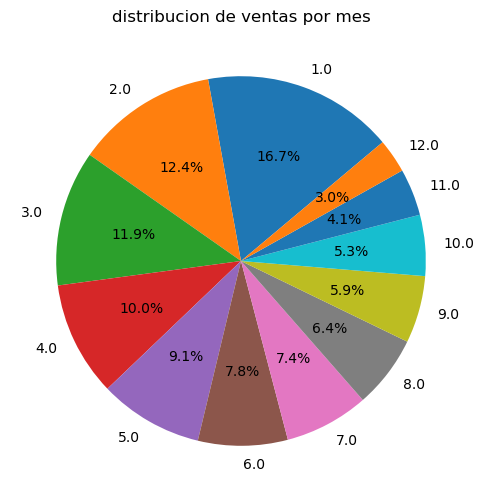

In [81]:
ventas_month=[]
for i in range(1,13):
    df_mes=df[df['fecha'].dt.month==i]
    resumen=df_mes['precio_total'].agg(['sum','count','min','max'])
    resumen['mes']=i
    ventas_month.append(resumen)
resultado = pd.DataFrame(ventas_month)
print(resultado)

plt.figure(figsize=(8,6))
plt.pie(resultado['sum'],startangle=40,labels=resultado['mes'], autopct='%1.1f%%' )
plt.title('distribucion de ventas por mes')
plt.show()

    

In [85]:
resumen['sum'].min()

1184601.1500000001

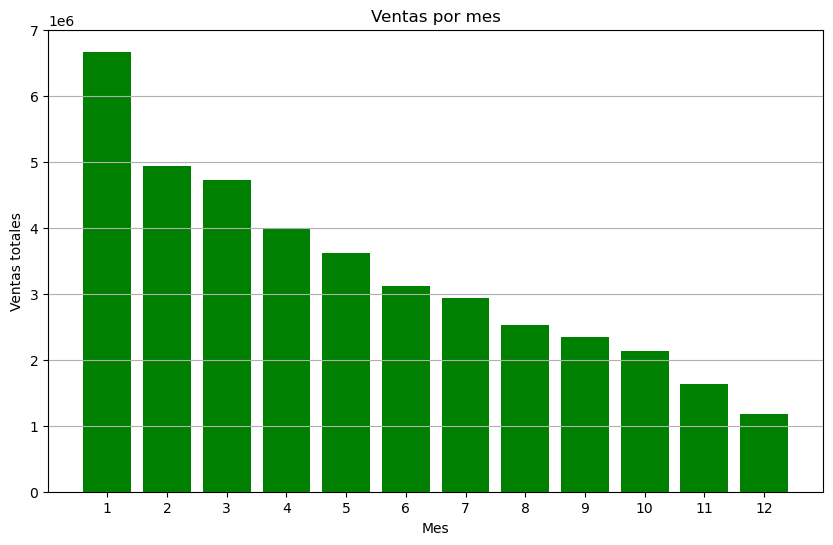

In [99]:
plt.figure(figsize=(10,6))
plt.bar(resultado['mes'], resultado['sum'], color='green')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')
plt.title('Ventas por mes')
plt.xticks(range(1, 13))  # Asegura que todos los meses estén
plt.grid(axis='y')
plt.show()

In [101]:
df.id_departamento.unique()

array([ 4, 16,  7, 20], dtype=int64)

In [115]:
# cual es el rendimiento de cada departamento en terminos de ventas 
df_departamento=df.sort_values('id_departamento', ascending=True)
df_departamento

,id_pedido,id_cliente,fecha,hora,id_departamento,id_seccion,id_producto,nombre_producto,precio_unitario,cantidad,precio_total
0,1,112108,2023-02-02,10,4,83,49683,Pepino Kirby,0.99,4,3.96
3239819,2227465,90517,2023-11-15,19,4,24,21137,Fresas Orgánicas,2.49,7,17.43
3239818,2227465,90517,2023-11-15,19,4,83,24964,Ajo Orgánico,0.98,10,9.80
3239817,2227465,90517,2023-11-15,19,4,24,8277,Manzana Honeycrisp Orgánica,1.78,5,8.90
3239816,2227465,90517,2023-11-15,19,4,83,22935,Cebolla Amarilla Orgánica,0.88,7,6.16
...,...,...,...,...,...,...,...,...,...,...,...
2844213,1956080,177877,2023-08-20,14,20,67,30489,Hummus Original,2.55,3,7.65
914683,629477,169633,2023-02-22,13,20,67,30489,Hummus Original,2.55,10,25.50
161686,111303,142330,2023-10-01,9,20,67,30489,Hummus Original,2.55,7,17.85
1076869,740849,201995,2023-10-03,13,20,67,30489,Hummus Original,2.55,7,17.85


In [117]:
df.describe()

,id_pedido,id_cliente,fecha,hora,id_departamento,id_seccion,id_producto,precio_unitario,cantidad,precio_total
count,4.975718e+06,4.975718e+06,4975718,4.975718e+06,4.975718e+06,4.975718e+06,4.975718e+06,4.975718e+06,4.975718e+06,4.975718e+06
mean,1.710496e+06,1.028372e+05,2023-05-15 06:11:44.462109952,1.341417e+01,4.992144e+00,5.809954e+01,2.862542e+04,1.596929e+00,5.015206e+00,8.009874e+00
min,1.000000e+00,1.000000e+00,2023-01-01 00:00:00,0.000000e+00,4.000000e+00,1.600000e+01,4.605000e+03,6.200000e-01,1.000000e+00,6.200000e-01
25%,8.552620e+05,5.111900e+04,2023-02-19 00:00:00,1.000000e+01,4.000000e+00,2.400000e+01,2.113700e+04,9.900000e-01,4.000000e+00,4.350000e+00
50%,1.710466e+06,1.024700e+05,2023-04-27 00:00:00,1.300000e+01,4.000000e+00,2.400000e+01,2.620900e+04,1.490000e+00,5.000000e+00,7.140000e+00
75%,2.565128e+06,1.543180e+05,2023-07-29 00:00:00,1.600000e+01,4.000000e+00,8.300000e+01,4.195000e+04,2.250000e+00,6.000000e+00,1.068000e+01
max,3.421083e+06,2.062090e+05,2023-12-31 00:00:00,2.300000e+01,2.000000e+01,1.230000e+02,4.968300e+04,2.850000e+00,1.300000e+01,3.705000e+01
std,9.873063e+05,5.950903e+04,NaN,4.259586e+00,3.382969e+00,3.909031e+01,1.292617e+04,6.695222e-01,1.983126e+00,4.803981e+00


In [133]:
ventas_departamento=[]

ventas_depar_uniqu=df_departamento['id_departamento'].unique()
for depto in ventas_depar_uniqu:
    df_depart=df_departamento[df_departamento['id_departamento']==depto]
    resumen=df_depart['precio_total'].agg(['sum','max','min','count'])
    resumen['id_departamento']=depto
    ventas_departamento.append(resumen)
resultado=pd.DataFrame(ventas_departamento)
print(resultado)
ventas_departamento = []


        

                      sum    max   min      count  id_departamento
precio_total  37003251.70  37.05  0.62  4529686.0              4.0
precio_total    376048.00  12.35  0.95    79101.0              7.0
precio_total   1529354.77  14.95  0.99   292892.0             16.0
precio_total    946220.85  33.15  2.55    74039.0             20.0


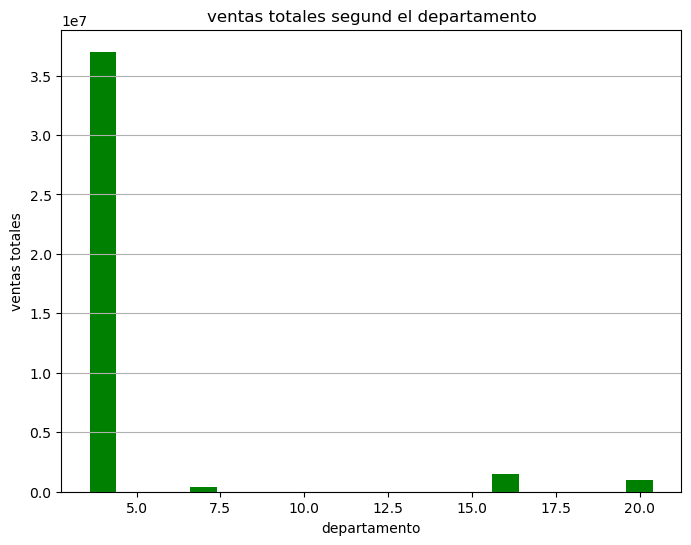

In [137]:
plt.figure(figsize=(8,6))
plt.bar(resultado['id_departamento'],resultado['sum'],color='green')
plt.xlabel('departamento')
plt.ylabel('ventas totales')
plt.title('ventas totales segund el departamento')
plt.grid(axis='y')
plt.show()

In [149]:
## como se distribuyen las ventas en las diferentes secciones 


df_seccion=df.sort_values('id_seccion',ascending=True)
df_seccion
print(df.id_seccion.unique())

[ 83  24 123  16  53  84 115  67]


In [161]:
ventas_seccion=df['id_seccion'].unique()
ventasSeccion=[]
for sec in ventas_seccion:
    df_seccion1=df_seccion[df_seccion['id_seccion']==sec]
    resumen=df_seccion1['precio_total'].agg(['sum','count','min','max'])
    resumen['id_seccion']=sec
    ventasSeccion.append(resumen)
resultado=pd.DataFrame(ventasSeccion)
print(resultado)

                      sum      count   min    max  id_seccion
precio_total   7237312.87  1100114.0  0.85  33.15        83.0
precio_total  20879374.69  2527855.0  0.62  32.37        24.0
precio_total   8634823.85   828809.0  1.25  37.05       123.0
precio_total    251740.29    72908.0  0.69   8.97        16.0
precio_total    821420.62   150362.0  1.02  14.95        53.0
precio_total    707934.15   142530.0  0.99  12.87        84.0
precio_total    376048.00    79101.0  0.95  12.35       115.0
precio_total    946220.85    74039.0  2.55  33.15        67.0


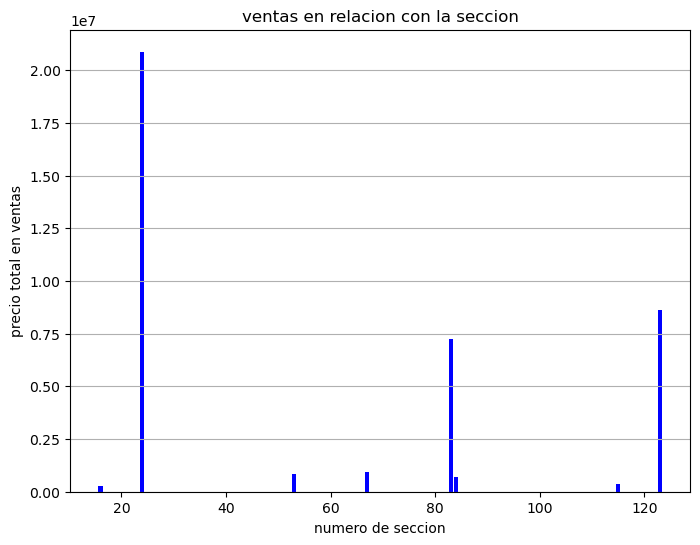

In [165]:
plt.figure(figsize=(8,6))
plt.bar(resultado['id_seccion'],resultado['sum'],color='blue')
plt.xlabel('numero de seccion')
plt.ylabel('precio total en ventas')
plt.title('ventas en relacion con la seccion')
plt.grid(axis='y')
plt.show()

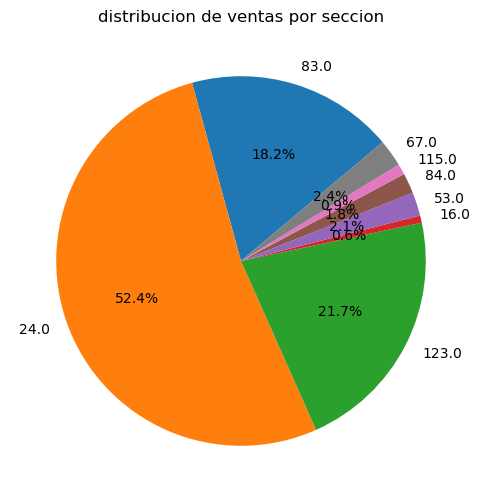

In [169]:
plt.figure(figsize=(8,6))
plt.pie(resultado['sum'],startangle=40,labels=resultado['id_seccion'], autopct='%1.1f%%' )
plt.title('distribucion de ventas por seccion')
plt.show()

In [171]:
df.nombre_producto.unique()


array(['Pepino Kirby', 'Bolsa de Bananas Orgánicas',
       'Aguacate Hass Orgánico', 'Col Rizada Orgánica de Michigan',
       'Zanahorias', 'Espinacas Baby Orgánicas', 'Frambuesas Orgánicas',
       'Banana', 'Cilantro Orgánico', 'Aguacate Orgánico',
       'Cebollas Amarillas', 'Fresas Orgánicas', 'Crema Orgánica',
       'Leche Entera Orgánica', 'Manzana Honeycrisp',
       'Agua con Gas de Pomelo', 'Espárragos',
       'Zanahorias Baby Orgánicas', 'Cebolla Roja Orgánica',
       'Racimo de Tomates Orgánicos', 'Limón Grande',
       'Cebolla Amarilla Orgánica', 'Uvas Rojas sin Semillas',
       'Rúcula Baby Orgánica', 'Manzana Fuji Orgánica', 'Fresas',
       'Arándanos Orgánicos', 'Manzanas Gala Orgánicas',
       'Tomates Cherry Orgánicos', 'Limón Orgánico', 'Pepino Orgánico',
       'Ajo Orgánico', 'Manzana Fuji Extra Grande Orgánica', 'Limones',
       'Manzana Honeycrisp Orgánica', 'Coliflor Fresca',
       'Hummus Original', 'Apio Orgánico en Ramillete Pequeño',
       'Calab

In [177]:
df_numerico = df.select_dtypes(include='number')
matriz_correlacion = df_numerico.corr()
matriz_correlacion


,id_pedido,id_cliente,hora,id_departamento,id_seccion,id_producto,precio_unitario,cantidad,precio_total
id_pedido,1.000000,-0.000260,0.000283,0.000040,0.000608,0.000540,-0.000035,-0.000333,-0.000358
id_cliente,-0.000260,1.000000,-0.002388,0.002296,-0.002219,-0.001173,0.000575,0.000744,0.000828
hora,0.000283,-0.002388,1.000000,-0.012683,0.004432,0.000995,0.003107,0.000768,0.002993
id_departamento,0.000040,0.002296,-0.012683,1.000000,0.089885,0.105036,-0.087003,0.000203,-0.060866
id_seccion,0.000608,-0.002219,0.004432,0.089885,1.000000,0.068340,0.095211,-0.000233,0.066361
id_producto,0.000540,-0.001173,0.000995,0.105036,0.068340,1.000000,-0.114259,0.000283,-0.079551
precio_unitario,-0.000035,0.000575,0.003107,-0.087003,0.095211,-0.114259,1.000000,0.000714,0.699480
cantidad,-0.000333,0.000744,0.000768,0.000203,-0.000233,0.000283,0.000714,1.000000,0.659568
precio_total,-0.000358,0.000828,0.002993,-0.060866,0.066361,-0.079551,0.699480,0.659568,1.000000


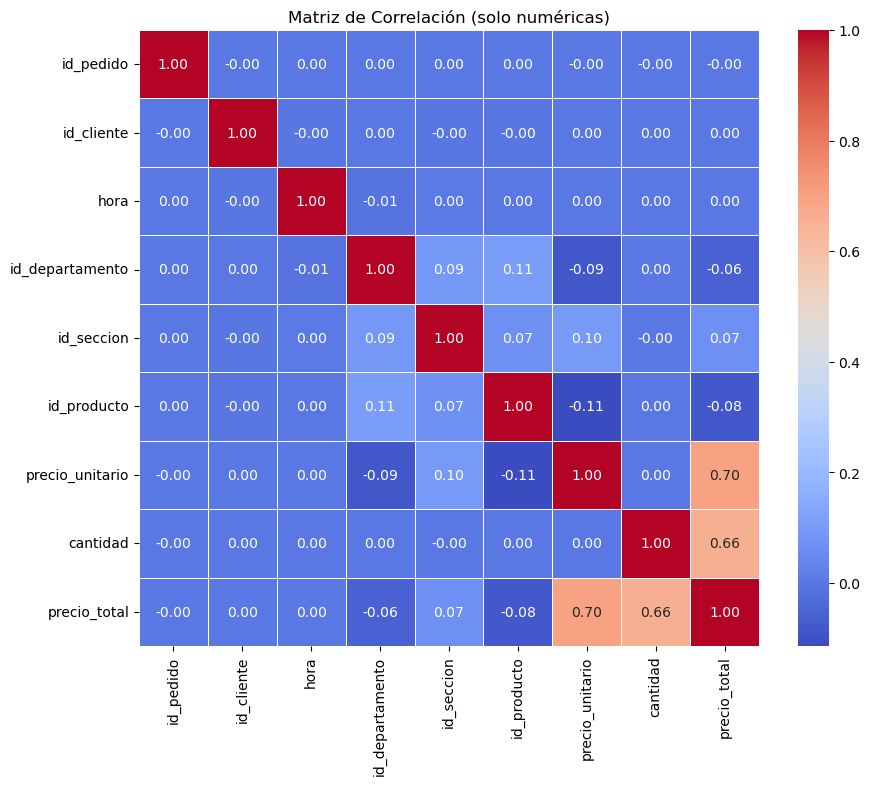

In [179]:

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (solo numéricas)')
plt.show()


In [217]:
### producto mas vendido 
producto_vendido=df.groupby('nombre_producto')['cantidad'].agg(['sum','count','max','min'])
producto_vendido.sort_values('sum', ascending=False)





,sum,count,max,min
nombre_producto,,,,
Banana,2460324,490518,13,1
Bolsa de Bananas Orgánicas,1976709,394108,13,1
Fresas Orgánicas,1381309,275018,13,1
Espinacas Baby Orgánicas,1258330,251321,13,1
Aguacate Hass Orgánico,1104957,220502,13,1
Aguacate Orgánico,923461,183961,13,1
Limón Grande,804752,160515,13,1
Fresas,748065,149198,13,1
Limones,733736,146437,13,1


In [219]:
### los productos que generan mas ingresos 
### producto mas vendido 
producto_vendido=df.groupby('nombre_producto')['precio_total'].agg(['sum','count','max','min'])
producto_vendido.sort_values('sum', ascending=False)


,sum,count,max,min
nombre_producto,,,,
Bolsa de Bananas Orgánicas,4842937.05,394108,31.85,2.45
Fresas Orgánicas,3439459.41,275018,32.37,2.49
Banana,2583340.20,490518,13.65,1.05
Frambuesas Orgánicas,2032919.25,142293,37.05,2.85
Aguacate Hass Orgánico,1977873.03,220502,23.27,1.79
Espinacas Baby Orgánicas,1874911.70,251321,19.37,1.49
Aguacate Orgánico,1616056.75,183961,22.75,1.75
Fresas,1533533.25,149198,26.65,2.05
Arándanos Orgánicos,1444778.50,104784,35.75,2.75
